In [1]:
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
local_device_protos

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 735741214587492661, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9901646488481899478
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4151543690403691147
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16101349786
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4908786553678188905
 physical_device_desc: "device: 0, name: Quadro P5000, pci bus id: 0000:00:05.0, compute capability: 6.1"]

In [2]:
import tensorflow as tf
print('Eager Execution On ->', tf.executing_eagerly())
print('Tensorflow Version ->', tf.__version__)

Eager Execution On -> True
Tensorflow Version -> 2.1.0-dev20191029


In [3]:
from config import *
from src.utils import *
from src.dataset import *
from src.models import *
from src.losses import *
from src.training import *

In [4]:
path = download_existing_dataset(EXISTING_DATASETS['maps'], 'maps')
print('Dataset Path ->', path)

Dataset Path -> /root/.keras/datasets/maps


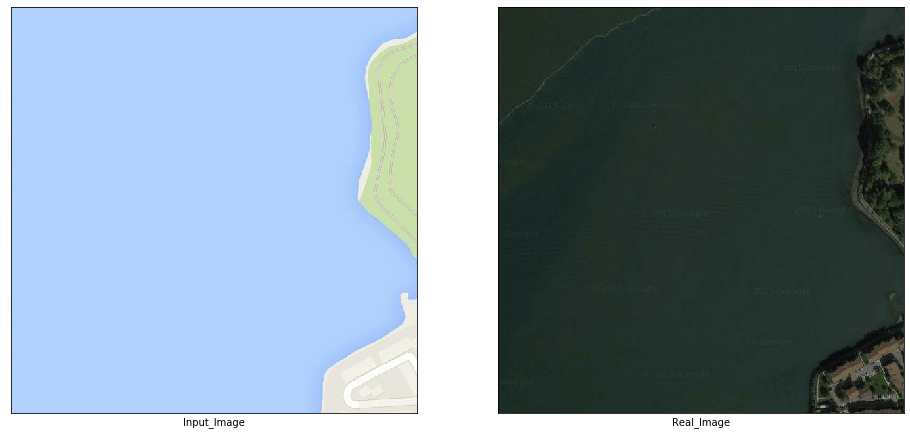

In [5]:
visualize(join(path, 'train/200.jpg'))

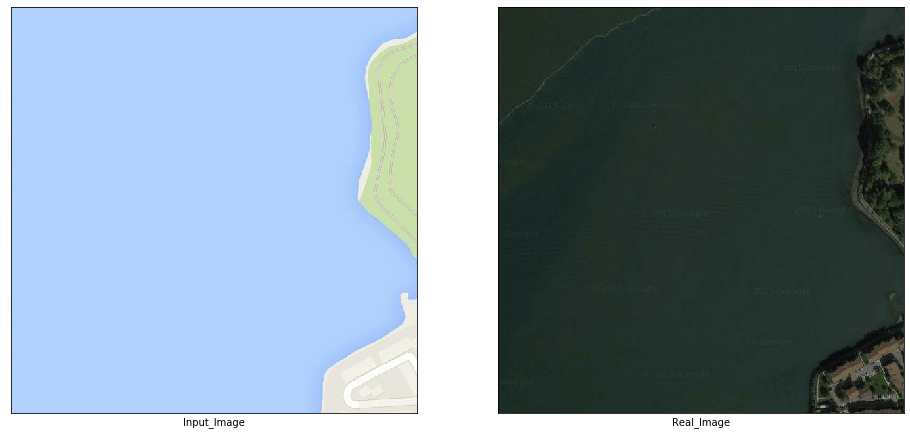

In [6]:
visualize(join(path, 'train/200.jpg'))

In [7]:
train_dataset, test_dataset = get_datasets(path)
print(train_dataset)
print(test_dataset)

<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 3)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 256, 256, None), (None, 256, 256, None)), types: (tf.float32, tf.float32)>


In [8]:
generator = Generator()
generator.summary()

Model: "Generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, None, 6 3072        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, None, 1 131584      sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, None, None, 2 525312      sequential_1[0][0]               
__________________________________________________________________________________________

In [9]:
discriminator = Discriminator()
discriminator.summary()

Model: "Discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
target_image (InputLayer)       [(None, None, None,  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, None, None, 6 0           input_image[0][0]                
                                                                 target_image[0][0]               
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, None, None, 6 6144        concatenate_1[0][0]  

In [10]:
discriminator_optimizer, generator_optimizer = get_optimizers()
checkpoint, checkpoint_prefix = get_checkpoint(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer
)

0it [00:00, ?it/s]

Epoch 1 going on....


1096it [01:49, 10.02it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 1 is 109.40589308738708 sec

Epoch 2 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 2 is 101.77940821647644 sec

Epoch 3 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 3 is 101.63545727729797 sec

Epoch 4 going on....


1096it [01:41, 10.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 4 is 101.59937834739685 sec

Epoch 5 going on....


1096it [01:41, 10.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 5 is 101.61163544654846 sec

Epoch 6 going on....


1096it [01:41, 10.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 6 is 101.6185712814331 sec

Epoch 7 going on....


1096it [01:41, 10.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 7 is 101.59582304954529 sec

Epoch 8 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 8 is 101.6323082447052 sec

Epoch 9 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 9 is 101.64568448066711 sec

Epoch 10 going on....


1096it [01:41, 10.78it/s]


Completed.


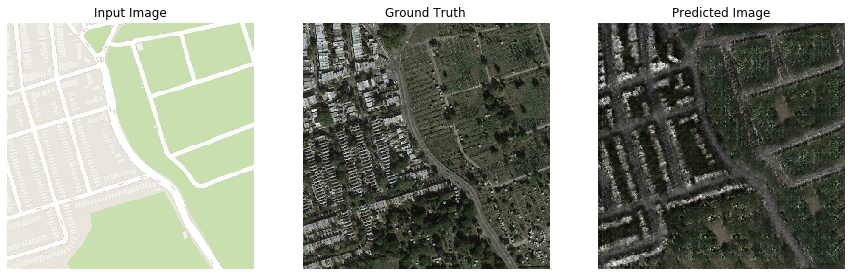

0it [00:00, ?it/s]

Time taken for epoch 10 is 102.24167704582214 sec

Epoch 11 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 11 is 101.83525896072388 sec

Epoch 12 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 12 is 101.78748679161072 sec

Epoch 13 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 13 is 101.83390736579895 sec

Epoch 14 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 14 is 101.83159375190735 sec

Epoch 15 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 15 is 101.8165979385376 sec

Epoch 16 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 16 is 101.86004066467285 sec

Epoch 17 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 17 is 101.8122341632843 sec

Epoch 18 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 18 is 101.83573794364929 sec

Epoch 19 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 19 is 101.80293107032776 sec

Epoch 20 going on....


1096it [01:41, 10.76it/s]


Completed.


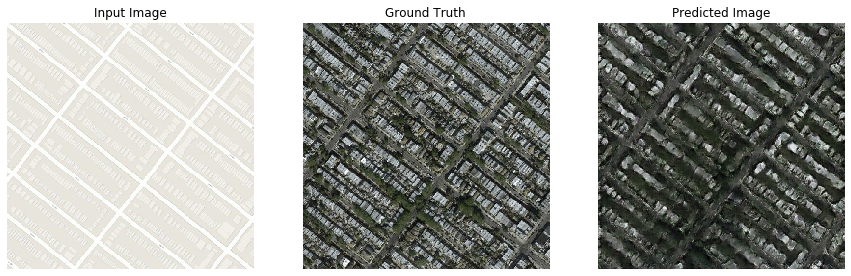

0it [00:00, ?it/s]

Time taken for epoch 20 is 102.42962288856506 sec

Epoch 21 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 21 is 101.79071497917175 sec

Epoch 22 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 22 is 101.80806422233582 sec

Epoch 23 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 23 is 101.85991334915161 sec

Epoch 24 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 24 is 101.91214370727539 sec

Epoch 25 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 25 is 101.89037823677063 sec

Epoch 26 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 26 is 101.81621742248535 sec

Epoch 27 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 27 is 101.91567540168762 sec

Epoch 28 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 28 is 101.86348247528076 sec

Epoch 29 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 29 is 101.84365916252136 sec

Epoch 30 going on....


1096it [01:41, 10.76it/s]


Completed.


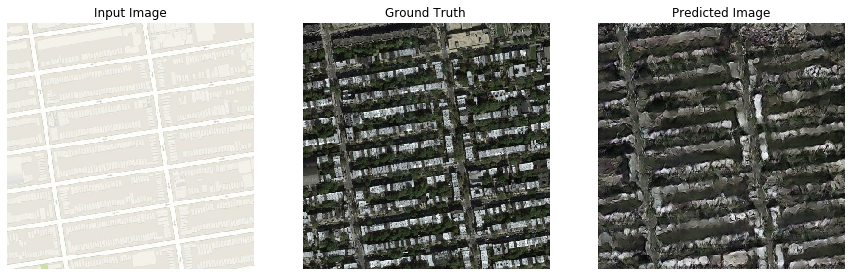

0it [00:00, ?it/s]

Time taken for epoch 30 is 102.4628221988678 sec

Epoch 31 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 31 is 101.90121459960938 sec

Epoch 32 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 32 is 101.93585300445557 sec

Epoch 33 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 33 is 101.95150518417358 sec

Epoch 34 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 34 is 101.94562482833862 sec

Epoch 35 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 35 is 101.8926215171814 sec

Epoch 36 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 36 is 101.91604089736938 sec

Epoch 37 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 37 is 101.93840336799622 sec

Epoch 38 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 38 is 101.87791347503662 sec

Epoch 39 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 39 is 101.91710162162781 sec

Epoch 40 going on....


1096it [01:41, 10.75it/s]


Completed.


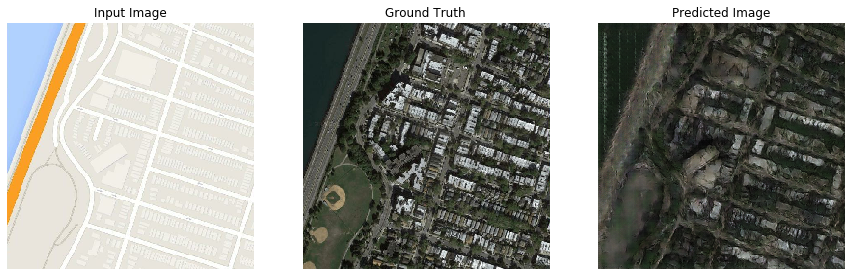

0it [00:00, ?it/s]

Time taken for epoch 40 is 102.5940773487091 sec

Epoch 41 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 41 is 101.90321207046509 sec

Epoch 42 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 42 is 101.94046020507812 sec

Epoch 43 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 43 is 101.85824513435364 sec

Epoch 44 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 44 is 101.91439318656921 sec

Epoch 45 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 45 is 101.91665053367615 sec

Epoch 46 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 46 is 101.84700536727905 sec

Epoch 47 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 47 is 101.84504675865173 sec

Epoch 48 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 48 is 101.87679862976074 sec

Epoch 49 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 49 is 101.89373755455017 sec

Epoch 50 going on....


1096it [01:41, 10.76it/s]


Completed.


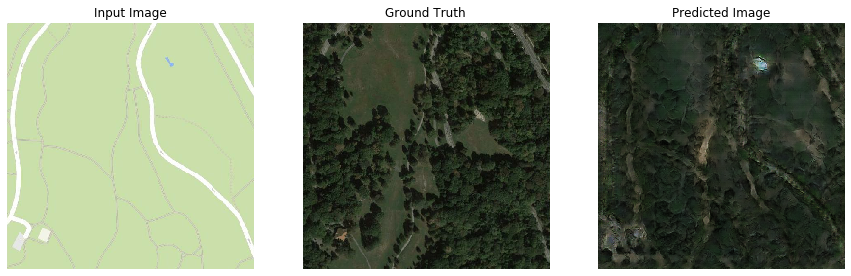

0it [00:00, ?it/s]

Time taken for epoch 50 is 102.47087454795837 sec

Epoch 51 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 51 is 101.93145489692688 sec

Epoch 52 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 52 is 101.92159104347229 sec

Epoch 53 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 53 is 101.94107580184937 sec

Epoch 54 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 54 is 101.9186623096466 sec

Epoch 55 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 55 is 101.8286395072937 sec

Epoch 56 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 56 is 101.8964958190918 sec

Epoch 57 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 57 is 101.9245285987854 sec

Epoch 58 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 58 is 101.94539976119995 sec

Epoch 59 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 59 is 101.92220830917358 sec

Epoch 60 going on....


1096it [01:41, 10.75it/s]


Completed.


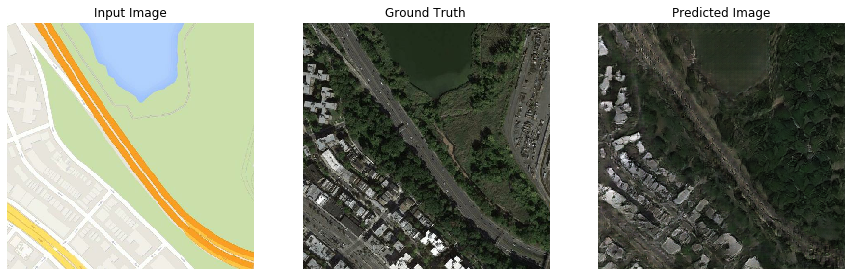

0it [00:00, ?it/s]

Time taken for epoch 60 is 102.51666307449341 sec

Epoch 61 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 61 is 101.92856431007385 sec

Epoch 62 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 62 is 101.947429895401 sec

Epoch 63 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 63 is 101.95710921287537 sec

Epoch 64 going on....


1096it [01:42, 10.74it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 64 is 102.02984356880188 sec

Epoch 65 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 65 is 101.93329000473022 sec

Epoch 66 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 66 is 101.97497463226318 sec

Epoch 67 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 67 is 101.97795796394348 sec

Epoch 68 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 68 is 101.94526243209839 sec

Epoch 69 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 69 is 101.8846709728241 sec

Epoch 70 going on....


1096it [01:41, 10.75it/s]


Completed.


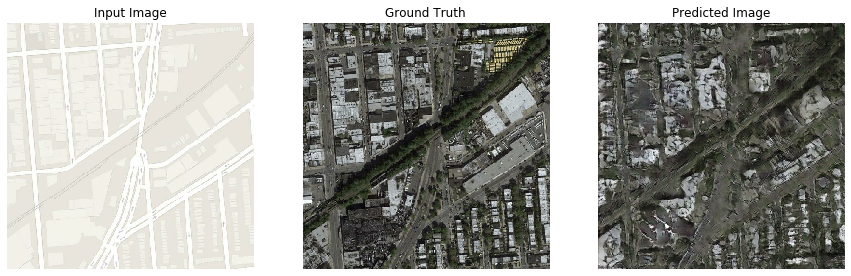

0it [00:00, ?it/s]

Time taken for epoch 70 is 102.58863592147827 sec

Epoch 71 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 71 is 101.93847942352295 sec

Epoch 72 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 72 is 101.99917340278625 sec

Epoch 73 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 73 is 101.98029088973999 sec

Epoch 74 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 74 is 101.97447657585144 sec

Epoch 75 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 75 is 101.98235988616943 sec

Epoch 76 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 76 is 101.89305663108826 sec

Epoch 77 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 77 is 101.80363368988037 sec

Epoch 78 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 78 is 101.70397782325745 sec

Epoch 79 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 79 is 101.71645641326904 sec

Epoch 80 going on....


1096it [01:41, 10.77it/s]


Completed.


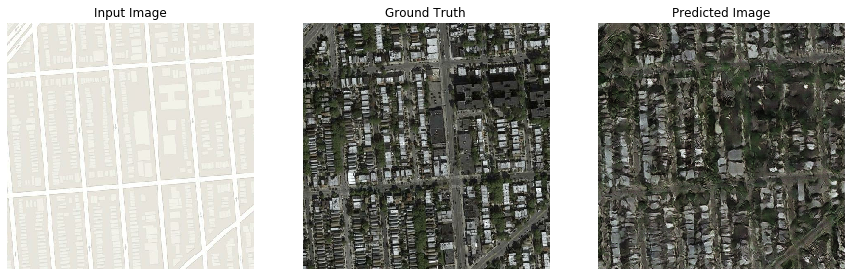

0it [00:00, ?it/s]

Time taken for epoch 80 is 102.35979747772217 sec

Epoch 81 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 81 is 101.75163507461548 sec

Epoch 82 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 82 is 101.78515291213989 sec

Epoch 83 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 83 is 101.76671719551086 sec

Epoch 84 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 84 is 101.6892466545105 sec

Epoch 85 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 85 is 101.70970439910889 sec

Epoch 86 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 86 is 101.71516108512878 sec

Epoch 87 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 87 is 101.82022523880005 sec

Epoch 88 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 88 is 101.87192797660828 sec

Epoch 89 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 89 is 101.86288237571716 sec

Epoch 90 going on....


1096it [01:41, 10.77it/s]


Completed.


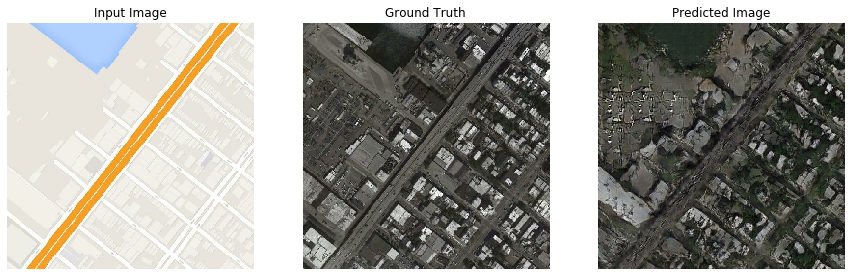

0it [00:00, ?it/s]

Time taken for epoch 90 is 102.33297038078308 sec

Epoch 91 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 91 is 101.83332681655884 sec

Epoch 92 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 92 is 101.80826020240784 sec

Epoch 93 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 93 is 101.74153733253479 sec

Epoch 94 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 94 is 101.74043345451355 sec

Epoch 95 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 95 is 101.77312636375427 sec

Epoch 96 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 96 is 101.74837613105774 sec

Epoch 97 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 97 is 101.72095918655396 sec

Epoch 98 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 98 is 101.85738682746887 sec

Epoch 99 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 99 is 101.90952134132385 sec

Epoch 100 going on....


1096it [01:41, 10.76it/s]


Completed.


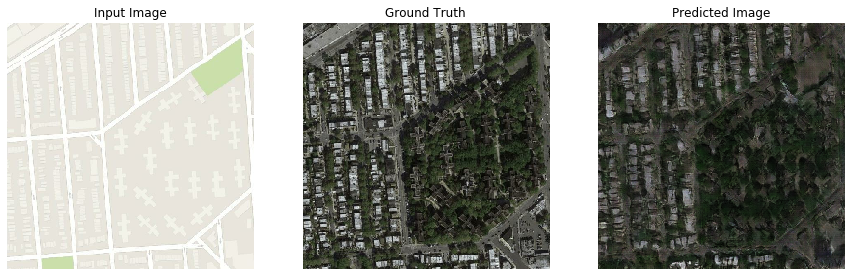

0it [00:00, ?it/s]

Time taken for epoch 100 is 102.42493295669556 sec

Epoch 101 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 101 is 101.8717999458313 sec

Epoch 102 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 102 is 101.87858486175537 sec

Epoch 103 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 103 is 101.85044622421265 sec

Epoch 104 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 104 is 101.85858845710754 sec

Epoch 105 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 105 is 101.85436773300171 sec

Epoch 106 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 106 is 101.89362931251526 sec

Epoch 107 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 107 is 101.84532880783081 sec

Epoch 108 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 108 is 101.81854009628296 sec

Epoch 109 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 109 is 101.79865145683289 sec

Epoch 110 going on....


1096it [01:41, 10.76it/s]


Completed.


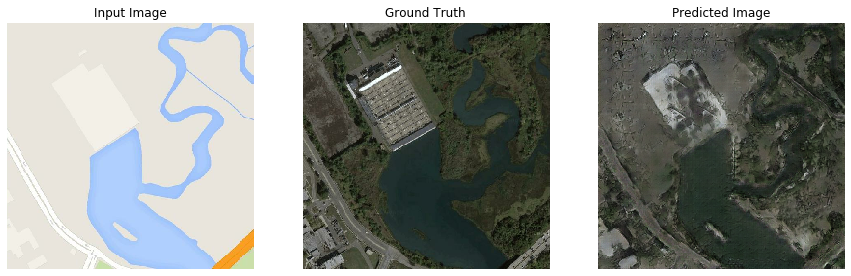

0it [00:00, ?it/s]

Time taken for epoch 110 is 102.37017965316772 sec

Epoch 111 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 111 is 101.85886025428772 sec

Epoch 112 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 112 is 101.86848545074463 sec

Epoch 113 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 113 is 101.83809089660645 sec

Epoch 114 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 114 is 101.8484296798706 sec

Epoch 115 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 115 is 101.80648756027222 sec

Epoch 116 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 116 is 101.70624732971191 sec

Epoch 117 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 117 is 101.69683408737183 sec

Epoch 118 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 118 is 101.71501302719116 sec

Epoch 119 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 119 is 101.7358992099762 sec

Epoch 120 going on....


1096it [01:41, 10.76it/s]


Completed.


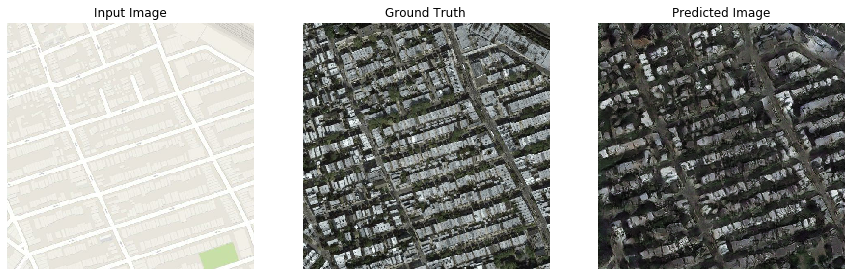

0it [00:00, ?it/s]

Time taken for epoch 120 is 102.44186758995056 sec

Epoch 121 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 121 is 101.84131360054016 sec

Epoch 122 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 122 is 101.89562702178955 sec

Epoch 123 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 123 is 101.86064076423645 sec

Epoch 124 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 124 is 101.84389877319336 sec

Epoch 125 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 125 is 101.86112546920776 sec

Epoch 126 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 126 is 101.84761023521423 sec

Epoch 127 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 127 is 101.81056141853333 sec

Epoch 128 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 128 is 101.8812084197998 sec

Epoch 129 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 129 is 101.8522379398346 sec

Epoch 130 going on....


1096it [01:41, 10.76it/s]


Completed.


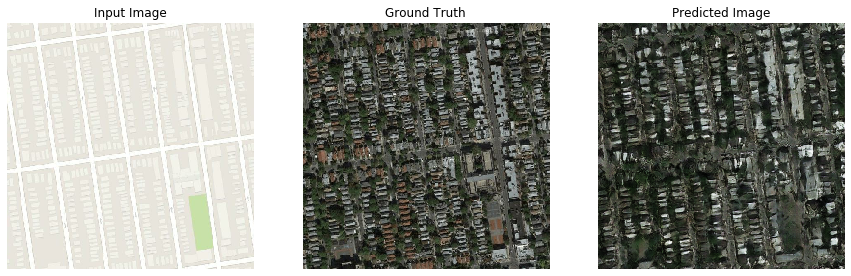

0it [00:00, ?it/s]

Time taken for epoch 130 is 102.41645073890686 sec

Epoch 131 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 131 is 101.88575839996338 sec

Epoch 132 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 132 is 101.8420250415802 sec

Epoch 133 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 133 is 101.87322306632996 sec

Epoch 134 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 134 is 101.8478217124939 sec

Epoch 135 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 135 is 101.85056185722351 sec

Epoch 136 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 136 is 101.80244493484497 sec

Epoch 137 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 137 is 101.74075317382812 sec

Epoch 138 going on....


1096it [01:41, 10.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 138 is 101.7077043056488 sec

Epoch 139 going on....


1096it [01:41, 10.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 139 is 101.81152033805847 sec

Epoch 140 going on....


1096it [01:41, 10.76it/s]


Completed.


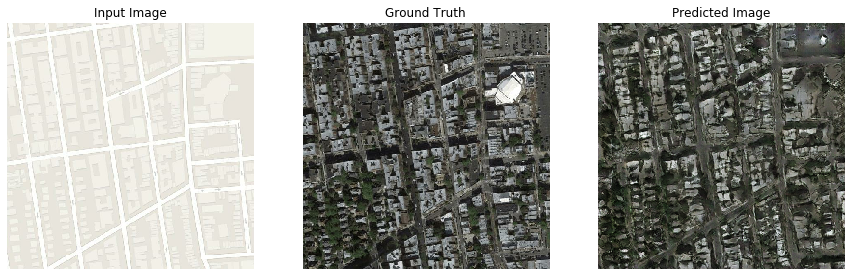

0it [00:00, ?it/s]

Time taken for epoch 140 is 102.46430778503418 sec

Epoch 141 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 141 is 101.85868167877197 sec

Epoch 142 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 142 is 101.86781358718872 sec

Epoch 143 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 143 is 101.91175413131714 sec

Epoch 144 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 144 is 101.89389324188232 sec

Epoch 145 going on....


1096it [01:41, 10.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 145 is 101.90071392059326 sec

Epoch 146 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 146 is 101.92164039611816 sec

Epoch 147 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 147 is 101.92912745475769 sec

Epoch 148 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 148 is 101.9363021850586 sec

Epoch 149 going on....


1096it [01:41, 10.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 149 is 101.95435047149658 sec

Epoch 150 going on....


945it [01:27, 10.86it/s]

In [ ]:
generator_loss_history, discriminator_loss_history = train(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer,
    train_dataset, test_dataset,
    checkpoint, checkpoint_prefix
)

In [ ]:
for _input, _target in test_dataset.take(5):
    generate_images(generator, _input, _target)